In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import sklearn
print("package版本信息：")
print("numpy:      ", np.__version__)
print("pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)
print("seaborn:    ", sns.__version__)

from IPython.display import display

package版本信息：
numpy:       1.21.2
pandas:      1.3.3
matplotlib:  3.4.3
sklearn:     0.24.2
seaborn:     0.11.2


In [ ]:
# 可选
import plotly
import plotly.express as px
from plotly import graph_objects as go
print("plotly:     ", plotly.__version__)

# 数据集

In [23]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.2)
print(X.shape)
print(y.shape)

(500, 2)
(500,)


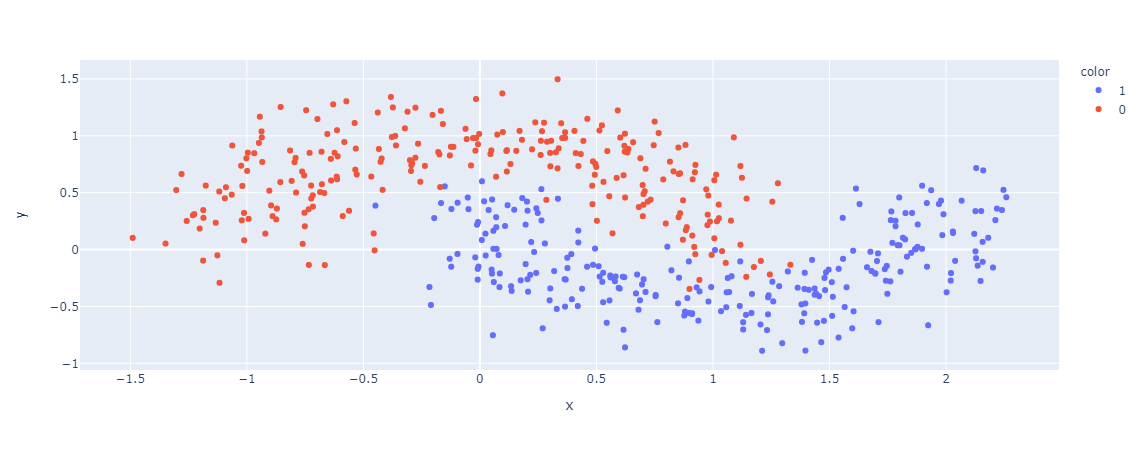

In [24]:
# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111)
# ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
fig = px.scatter(x=X[:,0], y=X[:,1], color=y.astype(str))
fig.update_layout(
    width=600,   #绘图宽度
    height=450   #绘图高度
)
fig.show()

# Sklearn中的SVM

主要是用`sklearm.svm`这个module中的`SVC`（分类）和`SVR`（回归）这两个类.

`SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)`

+ 参数
 + **`C`**，软间隔的惩罚项系数，默认为1  
 C越大，SVM的软间隔越小，否则越大
 + **`kernel`**,核函数
   + `linear`
   + `rbf`
   + `poly`
   + `sigmoid`
 + `degree`, 选择多项式核`poly`时的多项式阶数，其他kernel时此参数会被忽略
 + `gamma`, rbf、poly 和 sigmoid 核函数的系数设置方案
   + `auto`, 
   + `scale`, 
 + `coef`, 核函数的常数项，只对 poly 和 sigmoid 生效
 + `shrinking`, 反应尚不明确，建议不要改动
 + **`probability`**, bool值.  
 表示是否开启概率预测，**开启之后，`SVC`对象的`predict_log_proba()`方法和`predict_proba()` 方法才可用** 。  
 这个必须在调用`.fit()`方法之前开启，开启后，SVC的运行速度会有所下降。
 + `decision_function_shape`，取值为 `ovo` 或者 `ovr`，表示是否返回决策函数的值。**这个参数对 二分类  不起作用**.
   + `ovo` (one-vs-one)时，`shape=(n_samples, n_classes * (n_classes - 1) / 2)`
   + `ovr` (one-vs-rest)时，`shape=(n_samples, n_classes)`
 + `tol`, 误差下降的最低标准，默认为 1e-3.
 + `class_weight`
 
 
+ `SVC`类实例的属性值如下：
 + **`support_`**, shape=`(n_SV,)`, 支持向量的indice
 + **`support_vectors_`**, shape=`(n_SV, n_features)`, 支持向量
 + **`n_support_`**, shape=`(n_classes,)`, 每个类的支持向量个数
 + `classes_`, shape=`(n_classes,)`, 类标签列表
 + `class_weight_`, shape=`(n_classes,)`, 每个类的正则项系数
 + `coef_`, shape=`(n_classes,)`, 只在 linear 核函数下生效
 + `duel_coef`, shape=`(n_classes - 1, n_SV)`, 支持向量在对偶问题中的系数
 + `fig_status_`, 0表示训练成功，1表示失败，会有warning
 + `intercept_`, shape=`(n_classes*(n_classes-1)/2, )`, 决策函数中的常数项
 + `probA_`, shape=`n_classes * (n_classes - 1) / 2`
 + `probB_`, shape=`n_classes * (n_classes - 1) / 2`
 + `shape_fit_`
 
 
+ `SCV`类实例的方法如下：
  + `fit(X, y)`，训练
  + `predict(X)`，预测
  + `score(X, y)`，计算训练好的模型在给定数据集上的平均精度
  + **`decision_function(X)`, 计算样本点到超平面的距离**.
  + **`predict_proba(X)`和 `predict_log_proba(X)`, 计算样本点属于某一类的概率，必须要`probability=True`才能使用.**

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

## RBF核函数

In [64]:
%%time
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X, y)

Wall time: 5 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
# 预测值
y_pred = svm_rbf.predict(X)
# 预测概率
y_pred_prob = svm_rbf.predict_proba(X)
y_pred_log_prob = svm_rbf.predict_log_proba(X)

In [86]:
# 这里的类标签顺序对应了下面所有结果的类标签顺序
svm_rbf.classes_

array([0, 1], dtype=int64)

In [67]:
svm_rbf.fit_status_

0

In [68]:
svm_rbf.n_support_

array([46, 47])

In [69]:
svm_rbf.score(X, y)

0.96

In [87]:
CM = confusion_matrix(y_true=y, y_pred=y_pred, labels=[1,0])
CM

array([[243,   7],
       [ 13, 237]], dtype=int64)

In [88]:
ACC = accuracy_score(y_true=y, y_pred=y_pred)
ACC

0.96

In [89]:
PREC = precision_score(y_true=y, y_pred=y_pred)
PREC

0.94921875

In [90]:
F1 = f1_score(y_true=y, y_pred=y_pred)
F1

0.9604743083003953

In [91]:
print("y_true: ")
display(y[:10])
print("y_pred: ")
display(y_pred[:10])
print("y_pred_prob: ")
display(y_pred_prob[:10])
print("y_pred_log_prob: ")
display(y_pred_log_prob[:10])
print("手动计算log(y_pred_prob): ")
display(np.log(y_pred_prob[:10]))

y_true: 


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

y_pred: 


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

y_pred_prob: 


array([[3.77444992e-02, 9.62255501e-01],
       [3.91096512e-03, 9.96089035e-01],
       [9.99675330e-01, 3.24670173e-04],
       [9.99640690e-01, 3.59310419e-04],
       [1.78739457e-02, 9.82126054e-01],
       [8.62852464e-03, 9.91371475e-01],
       [6.77189992e-03, 9.93228100e-01],
       [9.86249994e-01, 1.37500060e-02],
       [9.97116827e-01, 2.88317329e-03],
       [3.90399047e-02, 9.60960095e-01]])

y_pred_log_prob: 


array([[-3.27691553e+00, -3.84752702e-02],
       [-5.54397110e+00, -3.91863294e-03],
       [-3.24722889e-04, -8.03270074e+00],
       [-3.59374987e-04, -7.93132387e+00],
       [-4.02441118e+00, -1.80356140e-02],
       [-4.75268175e+00, -8.66596589e-03],
       [-4.99497359e+00, -6.79493328e-03],
       [-1.38454129e-02, -4.28671602e+00],
       [-2.88733764e-03, -5.84886375e+00],
       [-3.24317096e+00, -3.98223950e-02]])

手动计算log(y_pred_prob): 


array([[-3.27691553e+00, -3.84752702e-02],
       [-5.54397110e+00, -3.91863294e-03],
       [-3.24722889e-04, -8.03270074e+00],
       [-3.59374987e-04, -7.93132387e+00],
       [-4.02441118e+00, -1.80356140e-02],
       [-4.75268175e+00, -8.66596589e-03],
       [-4.99497359e+00, -6.79493328e-03],
       [-1.38454129e-02, -4.28671602e+00],
       [-2.88733764e-03, -5.84886375e+00],
       [-3.24317096e+00, -3.98223950e-02]])

In [93]:
distances = svm_rbf.decision_function(X)
print(distances.shape)
distances[:10]

(500,)


array([ 0.99994716,  1.64469865, -2.1560624 , -2.1276739 ,  1.21515745,
        1.42177059,  1.49015021, -1.10682072, -1.54451317,  0.99010904])

## RBF核函数的ROC曲线

In [231]:
fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred_prob[:,1])
auc_score = roc_auc_score(y_true=y, y_score=y_pred_prob[:,1])
auc_score

0.8865919999999999

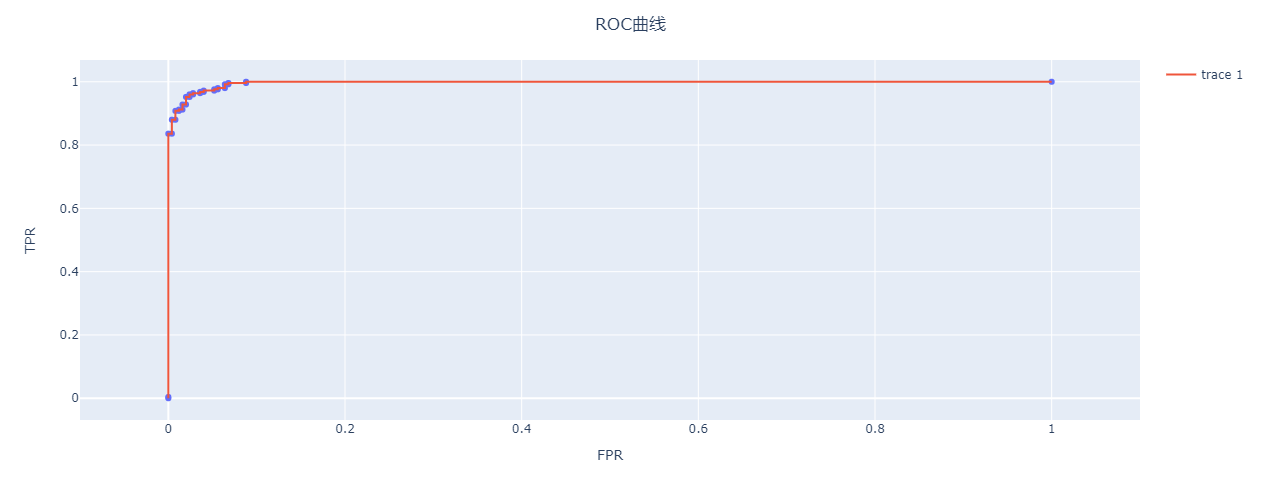

In [128]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)
# ax.plot(fpr, tpr)

# fig = px.line(x=fpr, y=tpr, width=600, height=500)
fig = px.scatter(x=fpr, y=tpr, width=600, height=500)
fig.add_trace(go.Scatter(x=fpr, y=tpr))
fig.update_layout(
#     margin={'l':80, 'r':0},
    title_text="ROC曲线",
    title_x=0.5,
    xaxis_title="FPR",
    yaxis_title="TPR"
)
fig.update_xaxes(
    range=(-0.1,1.1)
)
fig.show()

## RBF核函数结果可视化

<a list of 4 text.Text objects>

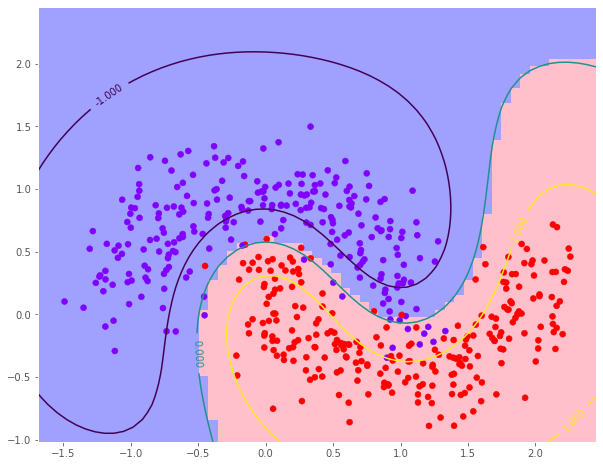

In [150]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 采样间隔
sample_interval = 60
axis_x = np.linspace(xlim[0],xlim[1],sample_interval)
axis_y = np.linspace(ylim[0],xlim[1],sample_interval)
axis_x,axis_y = np.meshgrid(axis_x,axis_y)
xy = np.vstack([axis_x.ravel(),axis_y.ravel()]).T

# 各个样本点到决策边界的距离
distance = svm_rbf.decision_function(xy).reshape(axis_x.shape)
# 分类的区域
area_pcolor = np.where(distance<0,-1,1)
color_light = matplotlib.colors.ListedColormap(['#A0A0FF', 'pink'])
# 绘制分类区域
ax.pcolormesh(axis_x, axis_y, area_pcolor, cmap=color_light, alpha=1)
# 绘制分类边界
cs = ax.contour(axis_x, axis_y, distance ,levels=[-1,0,1])
# 绘制样本点
ax.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
# 等高线增加刻度
ax.clabel(cs, inline=True)

+ Plotly绘图

# 探索不同核函数的效果

In [151]:
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

In [190]:
n_samples = 500
# 同心环形数据
data_cicle = make_circles(n_samples=n_samples, noise=0.2, factor=0.7)
# 月亮型数据
data_moon = make_moons(n_samples=n_samples, noise=0.2)
# 正态分布数据
data_blob = make_blobs(n_samples=n_samples, n_features=2, centers=[[3,3],[7,7]], cluster_std=2)
# 聚类数据
data_classify = make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0 ,n_classes=2
                                    , n_clusters_per_class=2, class_sep=0.7, hypercube=True, random_state=1
                                   )

Text(0.5, 1.0, 'Cluster Data')

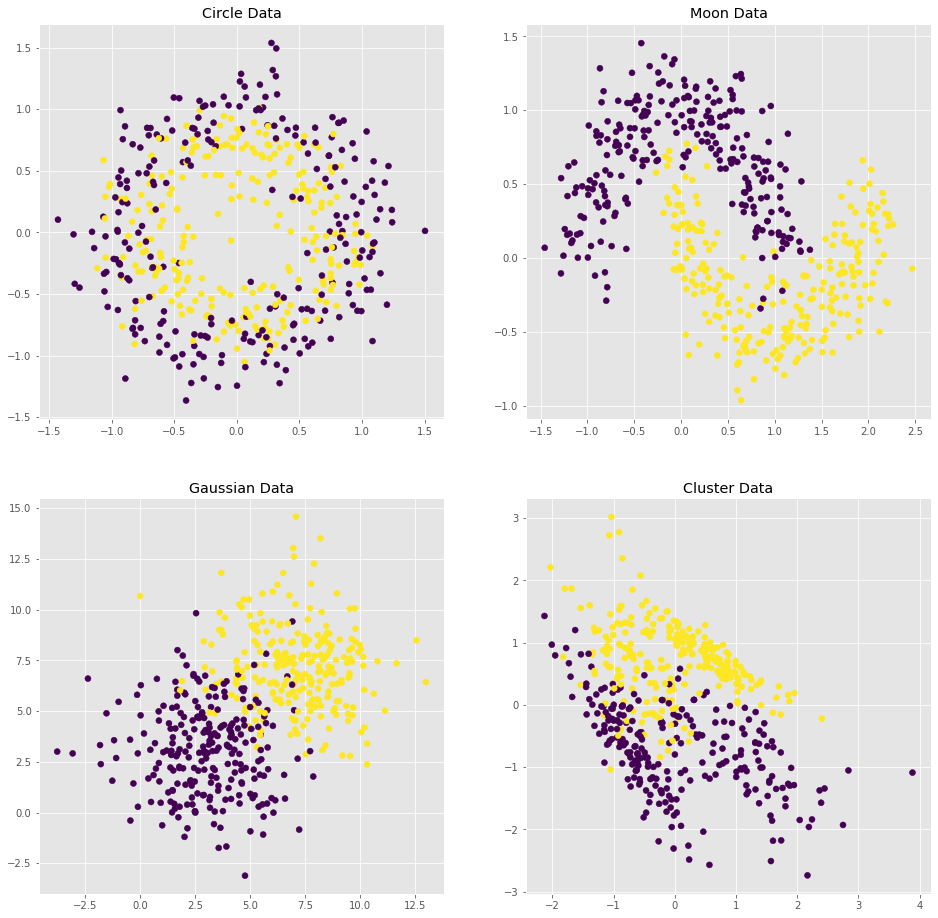

In [192]:
# 查看一下四个数据集的分布
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
axes[0,0].scatter(data_cicle[0][:,0], data_cicle[0][:,1], c=data_cicle[1])
axes[0,1].scatter(data_moon[0][:,0], data_moon[0][:,1], c=data_moon[1])
axes[1,0].scatter(data_blob[0][:,0], data_blob[0][:,1], c=data_blob[1])
axes[1,1].scatter(data_classify[0][:,0], data_classify[0][:,1], c=data_classify[1])
axes[0,0].set_title("Circle Data")
axes[0,1].set_title("Moon Data")
axes[1,0].set_title("Gaussian Data")
axes[1,1].set_title("Cluster Data")

In [193]:
data_list = [data_cicle, data_moon, data_blob, data_classify]
kernel_list = ["linear","poly","rbf","sigmoid"]

In [208]:
def svm_visualization(svm, X, y, ax, kernel):
    """
    可视化SVM的分类边界
    """
    ax.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 采样间隔
    sample_interval = 60
    axis_x = np.linspace(xlim[0],xlim[1],sample_interval)
    axis_y = np.linspace(ylim[0],xlim[1],sample_interval)
    axis_x,axis_y = np.meshgrid(axis_x,axis_y)
    xy = np.vstack([axis_x.ravel(),axis_y.ravel()]).T

    # 各个样本点到决策边界的距离
    distance = svm.decision_function(xy).reshape(axis_x.shape)
    # 分类的区域
    area_pcolor = np.where(distance<0,-1,1)
    color_light = matplotlib.colors.ListedColormap(['#A0A0FF', 'pink'])
    # 绘制分类区域
    ax.pcolormesh(axis_x, axis_y, area_pcolor, cmap=color_light, alpha=1)
    # 绘制分类边界
    cs = ax.contour(axis_x, axis_y, distance ,levels=[-1,0,1])
    # 绘制样本点
    ax.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
    # 等高线增加刻度
    ax.clabel(cs, inline=True)
    
    # 计算精确率
    score = svm.score(X, y)
#     ax.text(xlim[0]+0.5, ylim[1]-0.5, 'score:{}'.format(score), fontdict=dict(fontsize=10))

    ax.set_title(kernel+" kernel, score:{}".format(score))
    

In [228]:
def svm_roc_visualization(svm, X, y, ax, kernel):
    """
    可视化SVM的ROC曲线
    """
    y_pred_prob = svm.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred_prob[:,1])
    auc_score = roc_auc_score(y_true=y, y_score=y_pred_prob[:,1])
    ax.plot(fpr, tpr)
    ax.set_title(kernel+" kernel")
    ax.text(0.0,1.0, "AUC score: {0:.3f}".format(auc_score))
    

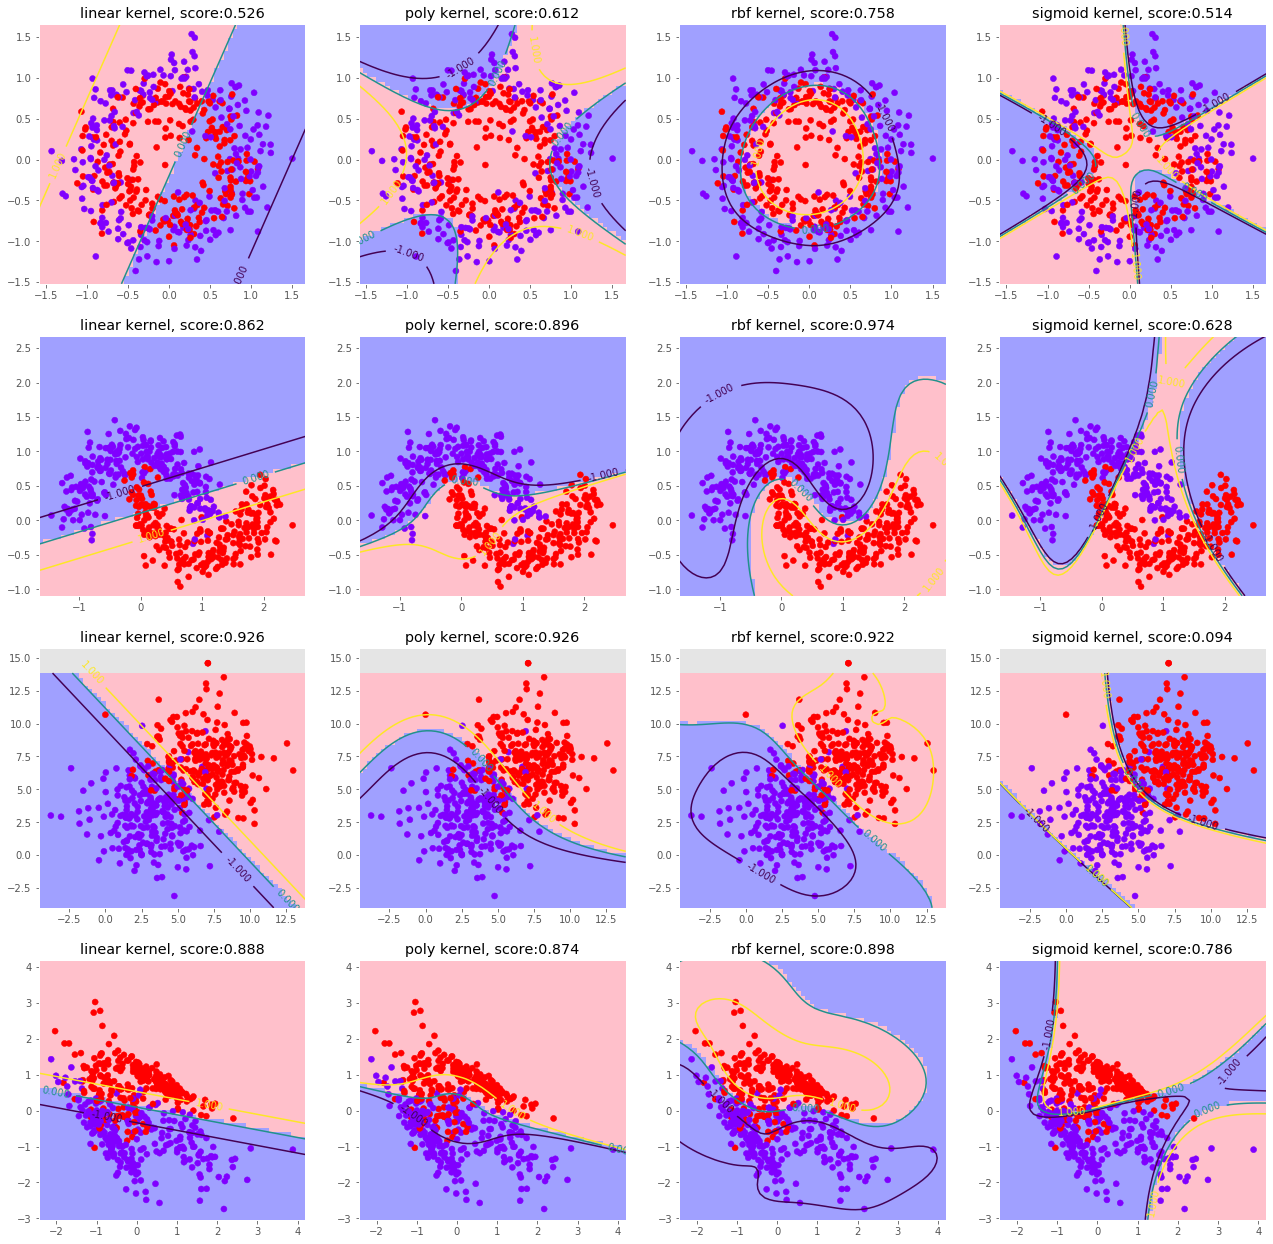

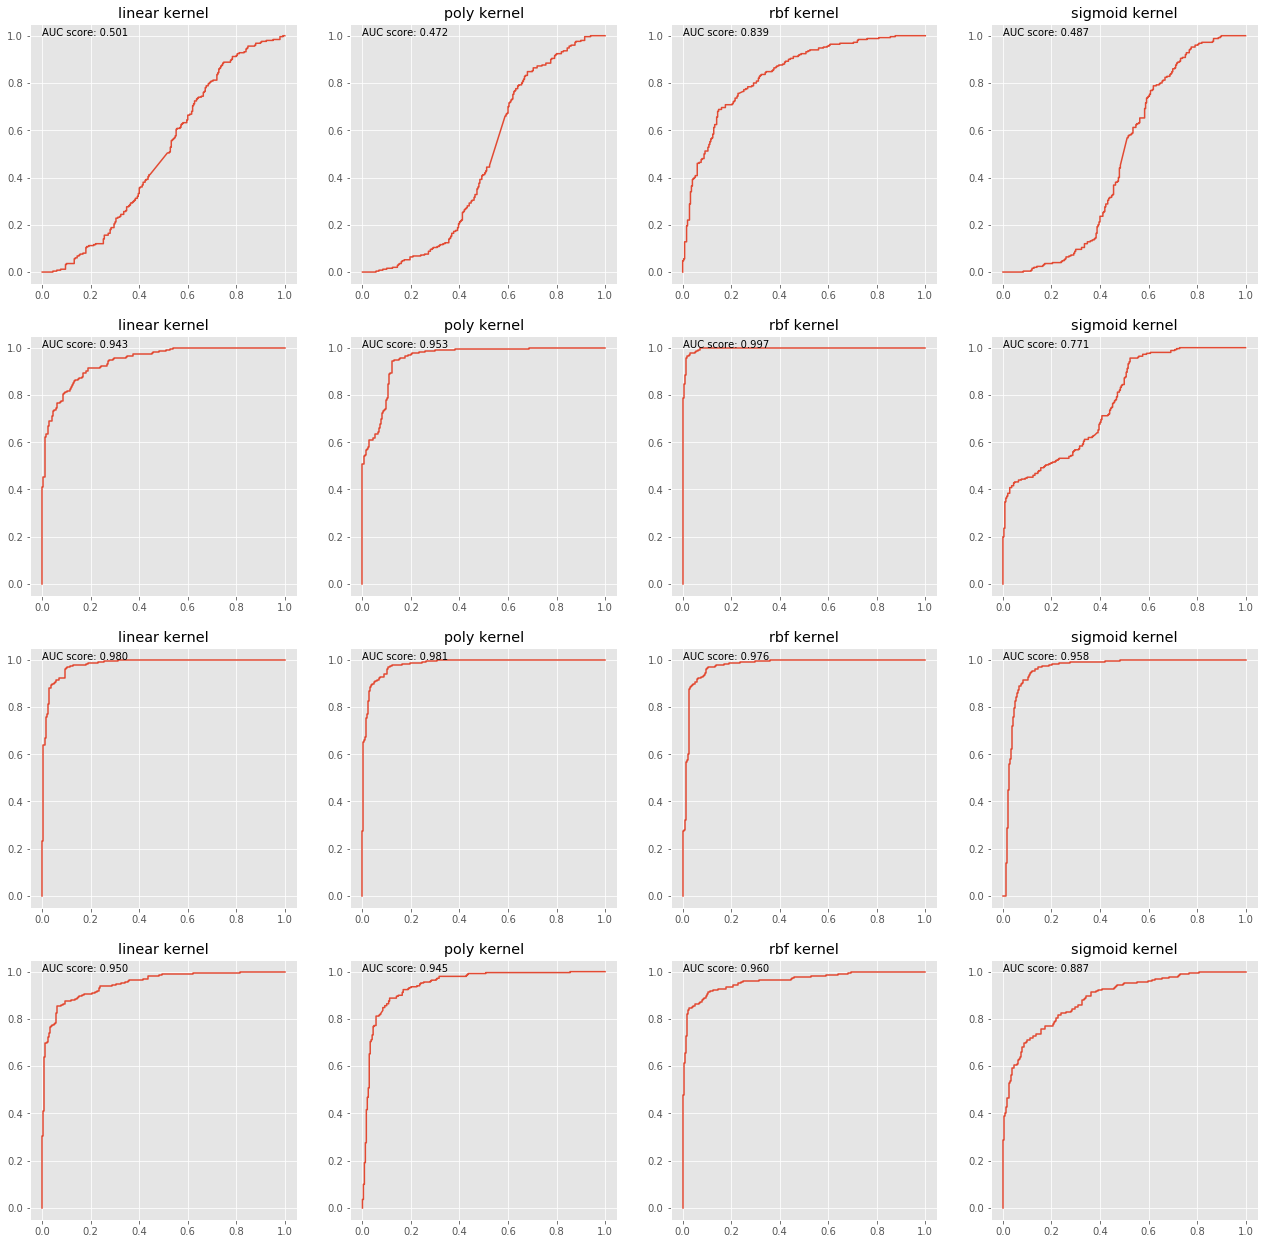

In [229]:
fig_svm, svm_axes = plt.subplots(nrows=4, ncols=4, figsize=(22,22))
fig_roc, roc_axes = plt.subplots(nrows=4, ncols=4, figsize=(22,22))

for i in range(len(data_list)):
    X, y = data_list[i]
    for j in range(len(kernel_list)):
        kernel = kernel_list[j]
        svm = SVC(kernel=kernel, probability=True)
        svm.fit(X, y)
#         y_pred = svm.predict(X)
#         y_pred_prob = svm.predict_proba(X)
        svm_visualization(svm, X, y, svm_axes[i,j], kernel)
        svm_roc_visualization(svm, X, y, roc_axes[i,j], kernel)
        

# 乳腺癌数据上的SVM效果

In [185]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from time import time
from datetime import datetime

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
cancer.data.shape

(569, 30)

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
np.unique(cancer.target)

array([0, 1])

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state=29)

多项式kernel跑不出来结果

In [30]:
# kernels = ['linear', 'rbf', 'sigmoid', 'poly']
kernels = ['linear', 'rbf', 'sigmoid']
for kernel in kernels:
    time0 = time()
    svc = SVC(kernel = kernel, gamma = 'auto').fit(Xtrain,ytrain)
    accuracy = svc.score(Xtest,ytest)
    print("The Accuracy under kernel {} is {}".format(kernel, accuracy))
    print(datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

The Accuracy under kernel linear is 0.9532163742690059
00:00:942194
The Accuracy under kernel rbf is 0.6081871345029239
00:00:014803
The Accuracy under kernel sigmoid is 0.6081871345029239
00:00:008163


检查数据集的量纲

In [31]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [32]:
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,max
mean radius,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.09744


由上可以看出，不同的特征取值不同，量纲差异比较大

In [33]:
from sklearn.preprocessing import StandardScaler

# 这里先标准化，再分割测试集是有问题的
X = StandardScaler().fit_transform(cancer.data)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, cancer.target, test_size = 0.3, random_state=29)

In [34]:
X.shape

(569, 30)

量纲统一之后，包括多项式核也能跑出来结果了；
并且所有核函数的结果都得到了提高

In [35]:
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
# kernels = ['linear', 'rbf', 'sigmoid']
for kernel in kernels:
    time0 = time()
    svc = SVC(kernel = kernel, gamma = 'auto').fit(Xtrain,ytrain)
    accuracy = svc.score(Xtest,ytest)
    print("The Accuracy under kernel {} is {}".format(kernel, accuracy))
    print(datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

The Accuracy under kernel linear is 0.9883040935672515
00:00:003865
The Accuracy under kernel rbf is 0.9824561403508771
00:00:004460
The Accuracy under kernel sigmoid is 0.9649122807017544
00:00:003671
The Accuracy under kernel poly is 0.8947368421052632
00:00:004167


RBF核函数的调参

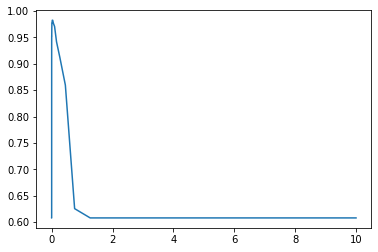

In [36]:
score = []
gamma_range = np.logspace(-10,1,50)
for gamma in gamma_range:
    svc = SVC(kernel='rbf',gamma=gamma)
    svc.fit(Xtrain, ytrain )
    score.append(svc.score(Xtest,ytest))
    
plt.plot(gamma_range, score)

In [37]:
print(max(score), gamma_range[score.index(max(score))])

0.9824561403508771 0.020235896477251554


不平衡类的处理

In [38]:
from sklearn.datasets import make_blobs

class_1 = 500 #类别1有500个样本 
class_2 = 50 #类别2只有50个 
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心 
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散 
X, y = make_blobs(n_samples=[class_1, class_2],centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

In [39]:
X.shape

(550, 2)

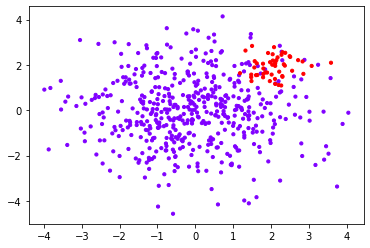

In [41]:
 plt.scatter(X[:,0],X[:,1], c=y, cmap='rainbow',s=10)

In [42]:
svc = SVC(kernel='linear', C=1)
svc.fit(X,y)
svc.score(X,y)

0.9418181818181818

In [43]:
svc_w = SVC(kernel='linear', C=1, class_weight={1:10})
svc_w.fit(X,y)
svc_w.score(X,y)

0.9127272727272727

绘制两种情况下的决策边界

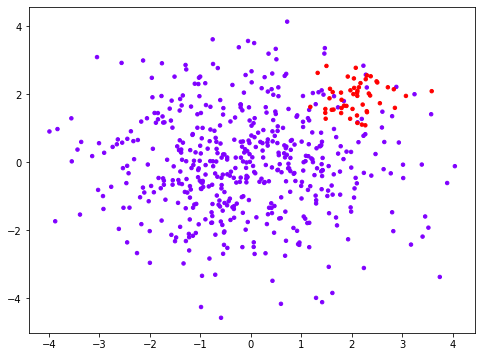

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0],X[:,1], c=y, cmap='rainbow',s=12)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

In [77]:
xy.shape

(900, 2)

In [78]:
Z_svc = svc.decision_function(xy)

In [79]:
Z_svc.shape

(900,)

In [80]:
Z_svc = svc.decision_function(xy).reshape(XX.shape)

In [81]:
Z_svc.shape

(30, 30)

In [82]:
Z_svc_w = svc_w.decision_function(xy).reshape(XX.shape)

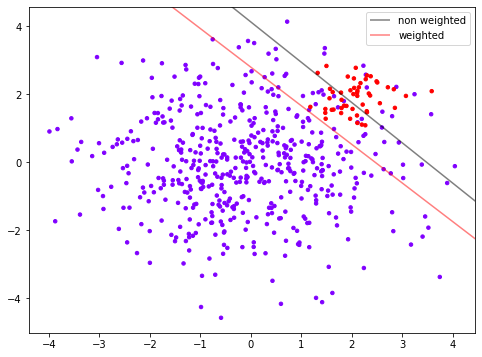

In [83]:
a = ax.contour(XX, YY, Z_svc, colors='black', levels=[0], linestyles=['-'], alpha=0.5)
b = ax.contour(XX, YY, Z_svc_w, colors='red', levels=[0], linestyles=['-'], alpha=0.5)
ax.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"])
fig

二分类的评估指标

混淆矩阵

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [97]:
svc_prob = SVC(kernel='linear', C=1, probability=True)
svc_prob.fit(X,y)
svc_prob.predict_proba(X)

array([[0.68172917, 0.31827083],
       [0.27038549, 0.72961451],
       [0.95874354, 0.04125646],
       ...,
       [0.16354981, 0.83645019],
       [0.35843778, 0.64156222],
       [0.32205679, 0.67794321]])

In [98]:
svc_prob.classes_

array([0, 1])

In [94]:
fpr, recall, thresholds = roc_curve(y, svc_prob.predict_proba(X)[:,1], pos_label=1)

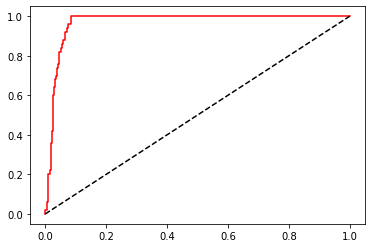

In [95]:
fig, ax = plt.subplots()
ax.plot(fpr, recall, color='red')
ax.plot([0, 1], [0, 1], color='black', linestyle='--')